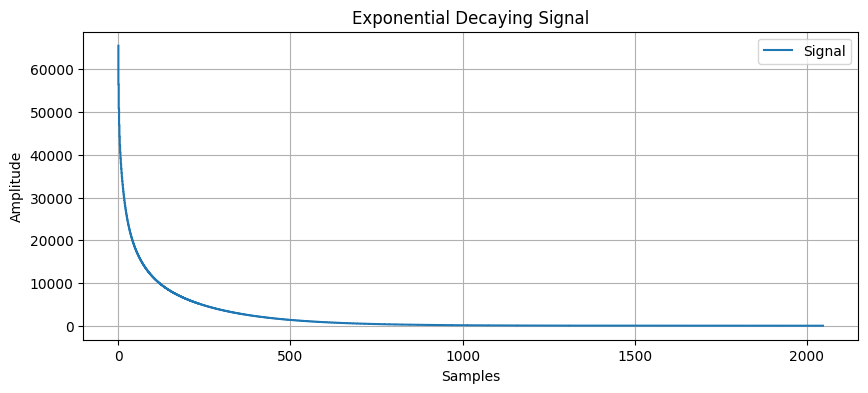

In [15]:
import matplotlib.pyplot as plt
import numpy as np

signal_data = np.genfromtxt('build/data/lut.csv', delimiter=',')

sampling_rate = 800000000
num_samples = len(signal_data)
time_array = np.arange(num_samples)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.step(time_array,signal_data, label='Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Exponential Decaying Signal')
plt.legend()
plt.grid()
plt.show()

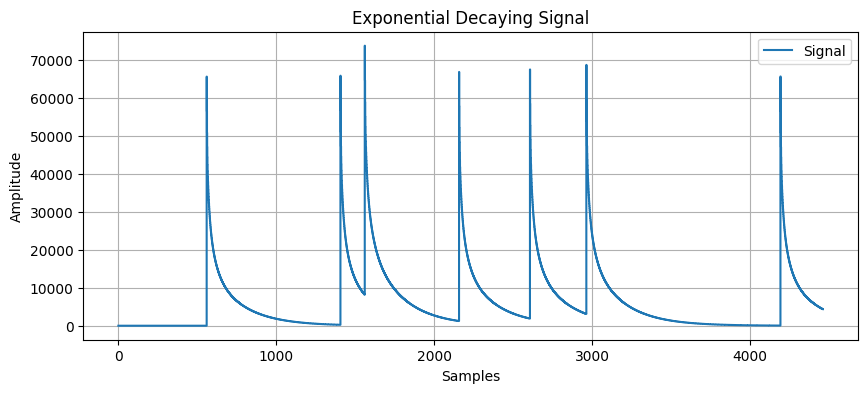

In [80]:
import matplotlib.pyplot as plt
import numpy as np

signal_data = np.genfromtxt('build/data/signal.csv', delimiter=',')

sampling_rate = 800000000
num_samples = len(signal_data)
time_array = np.arange(num_samples)

# Plot the signal
plt.figure(figsize=(10, 4))

plt.step(time_array,signal_data, label='Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Exponential Decaying Signal')
plt.legend()
plt.grid()

plt.show()


In [58]:
import numpy as np

# Define the parameters
tau = 1.0  # Adjust as needed
num_samples = 2048

# Create an array of `t` values for your LUT
t_values = np.linspace(0, 1, num_samples)  # Adjust the range as needed

# Calculate `exp(-t/tau)` for each `t` value
exp_values = np.exp(-t_values / tau)

# Normalize the values to the range [0, 1]
exp_values /= np.max(exp_values)

# Convert the normalized values to 16-bit integers
lut_values = (exp_values * 65535).astype(np.uint16)

# Now, `lut_values` contains your LUT with 16-bit depth

# To save the LUT to a file, you can use the following:
lut_values.tofile('exp_lut.bin')  # Save as a binary file


def linear_interpolation(t, LUT):
    # Find the indices for the two closest samples in the LUT
    index1 = int(t * (len(LUT) - 1))
    index2 = index1 + 1
    
    # Calculate the interpolation weight
    weight = t * (len(LUT) - 1) - index1
    
    # Perform linear interpolation
    result = (1 - weight) * LUT[index1] + weight * LUT[index2]
    
    return result

print(lut_values[2])

65471


In [60]:
linear_interpolation(t_values[2]/2, lut_values)

65502.0

In [49]:
exp_values[10]

0.9523220834045422

In [23]:
NUM_SENSORS = 8 
SIMULATION_TIME = 1
SAMPLE_FREQ = 800e6

taus = [9.34e-3, 2.83e-3, 43.0e-3, 0.38e-3]
signal, signal_int = [], []
max_amp_int = np.power(2,16)-1
sum = 0
for idx, ti in enumerate(t):
    for tau in taus:   

        sum += amplitude*np.exp(((-ti)/tau))
    
    signal.append(sum)
    signal_int.append(int(math.ceil(sum*max_amp_int)))
    sum=0



array([65535., 64720., 63916., 63122., 62338., 61564., 60799., 60044.,
       59298., 58561.])

In [12]:
np.random.poisson()

0

In [73]:
import numpy as np

# Average rate of decays per second (activity in Bq)
average_rate = 10

# Time interval (in seconds) over which to observe decays
time_interval = 1  # You can adjust this based on your specific time interval

# Generate a random number of pulses based on Poisson distribution
num_pulses = np.random.poisson(average_rate * time_interval)

# Print the number of pulses observed in this time interval
print(f"Number of pulses observed in {time_interval} seconds: {num_pulses}")

Number of pulses observed in 1 seconds: 9


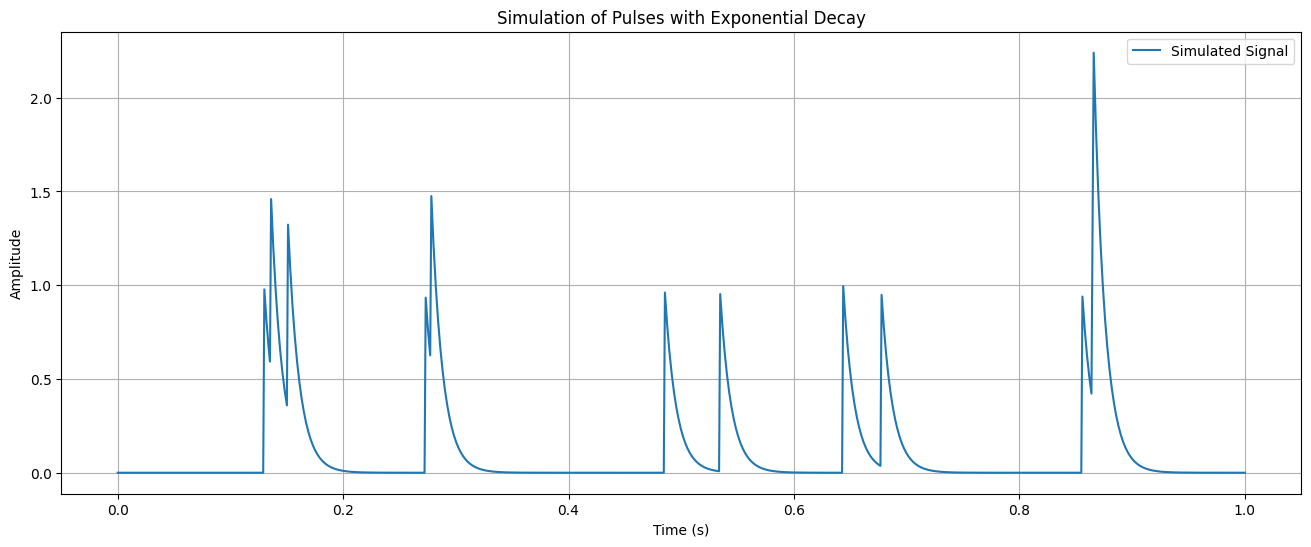

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the simulation
total_time = 1  # Total simulation time in seconds
tau = 10e-3 # Time constant for the exponential decay
activity = 10.0  # Activity in Bq

# Calculate the amplitude for the exponential decay pulse
# so that the integral of the pulse shape over the simulation time matches the activity
amplitude = 1
# Generate the time array for the entire simulation
time_points = np.linspace(0, total_time, 1000)

# Initialize the signal array with zeros
signal = np.zeros_like(time_points)

# Generate trigger times based on a Poisson distribution
num_pulses = np.random.poisson(lam=activity * total_time)
trigger_times = np.sort(np.random.uniform(0, total_time, num_pulses))

# Generate the pulse shapes and add them to the signal array
for trigger_time in trigger_times:
    # Generate the pulse shape for each trigger time
    pulse_shape = amplitude * np.exp(-(time_points - trigger_time) / tau)
    pulse_shape[time_points < trigger_time] = 0  # Set before trigger time to 0
    signal += pulse_shape

# Plot the simulation results
plt.figure(figsize=(16, 6))
plt.plot(time_points, signal, label='Simulated Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Simulation of Pulses with Exponential Decay')
plt.legend()
plt.grid(True)
plt.show()

#


In [170]:
trigger_times

array([0.13517455, 0.28692512, 0.63253456, 0.81822817, 0.96462544])

In [3]:
len(time_points)
from math import pi
from numpy import cos, absolute

NameError: name 'time_points' is not defined

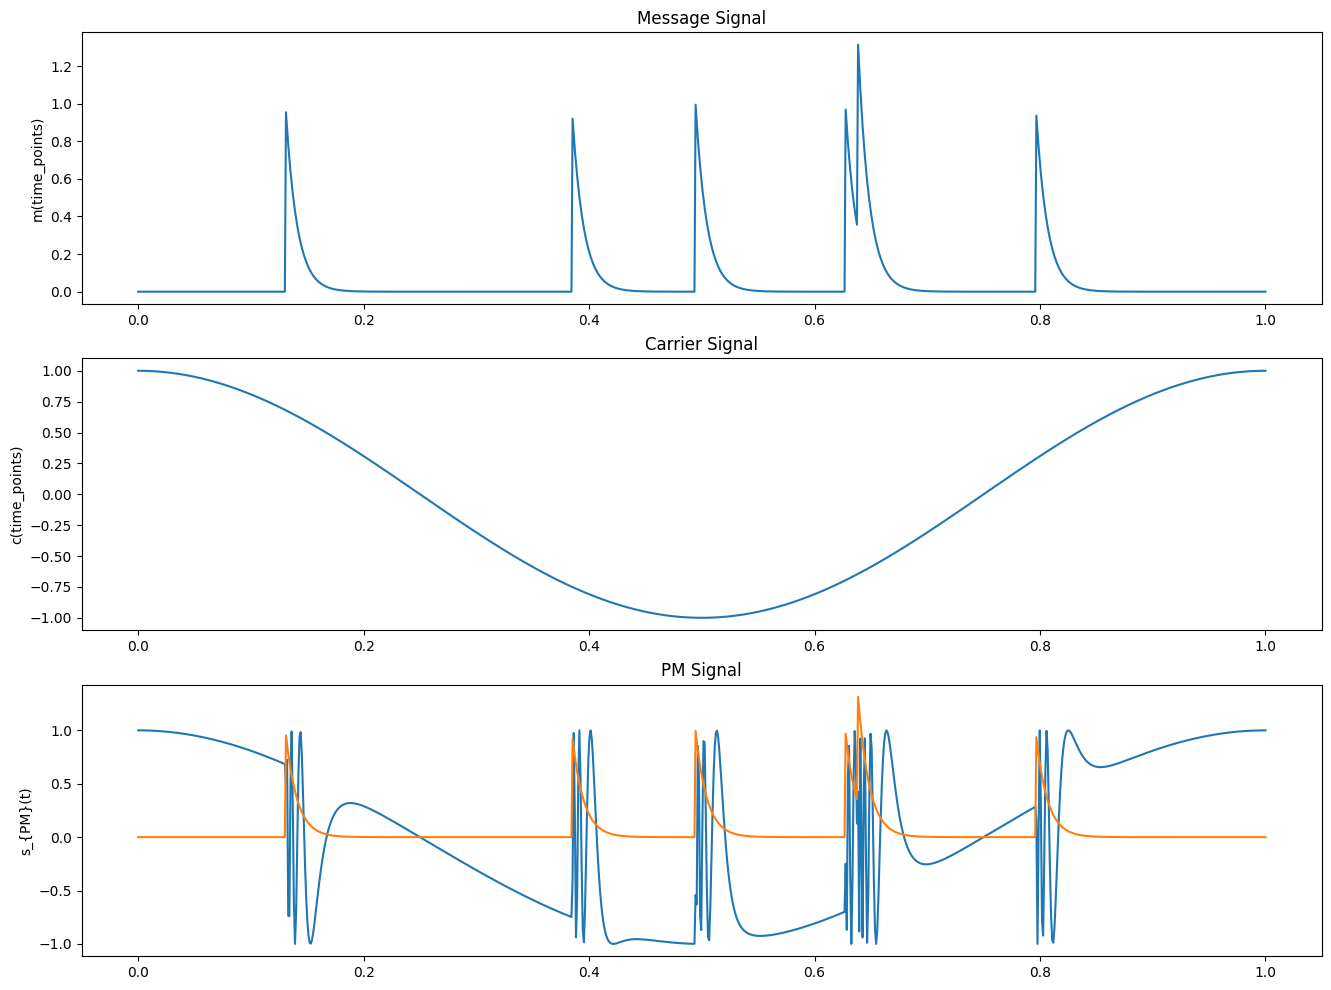

In [74]:
fs = 1/len(time_points) # Sampling Frequency
fc = 1e6 # Carrier Frequency
Ac = 1 # Carrier Amplitude
kp = 20 # Modulation Coefficient
C = Ac*cos(2*pi*fc*time_points) # Carrier Signal
s_PM = [ ]
for (ti, m) in zip(time_points, signal):
    s_PM.append(Ac*cos(2*pi*fc*ti + kp*m))



fig, axs = plt.subplots(3,1, figsize=(16,12))

axs[0].plot(time_points,signal)
axs[0].set(ylabel = 'm(time_points)')
axs[0].set_title('Message Signal')
axs[1].plot(time_points,C)
axs[1].set(ylabel = 'c(time_points)')
axs[1].set_title('Carrier Signal')
axs[2].plot(time_points,s_PM,time_points,signal)
axs[2].set(ylabel ='s_{PM}(t)')
axs[2].set_title('PM Signal')
plt.show()



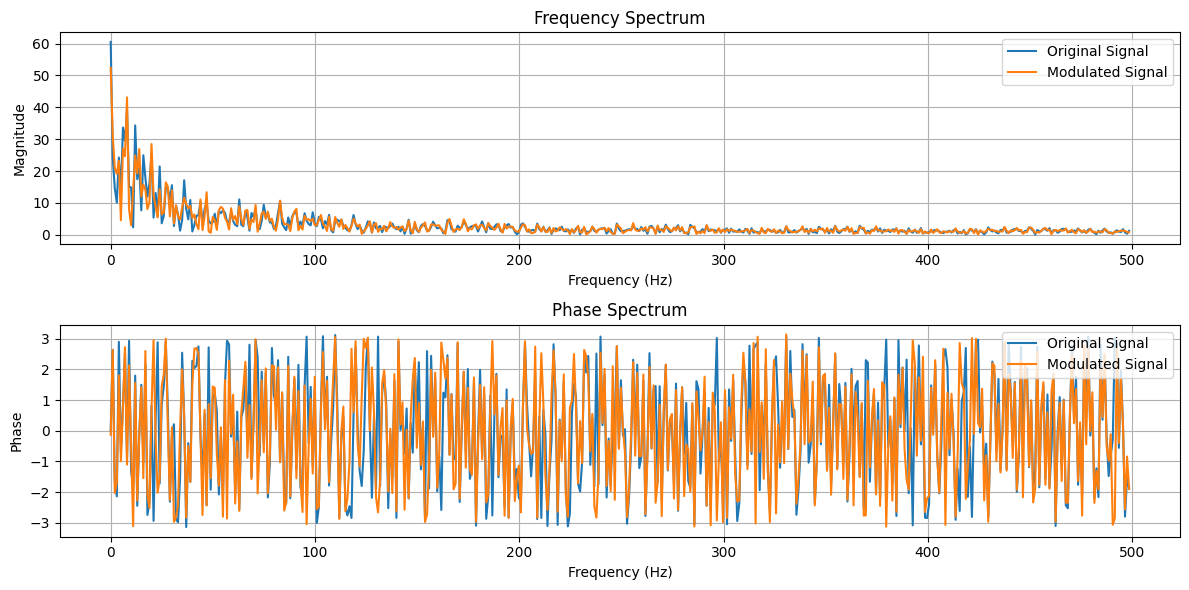

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_domain(time_points, signal, modulated_signal, sampling_rate=1.0):
    # Calculate the FFT for the signals
    fft_signal = np.fft.fft(signal)
    fft_modulated_signal = np.fft.fft(modulated_signal)

    # Calculate the frequencies corresponding to the FFT result
    n = len(time_points)
    frequencies = np.fft.fftfreq(n, d=time_points[1] - time_points[0])
    positive_frequencies = frequencies[:n//2]  # Only plot positive frequencies

    # Plot the magnitude spectrum
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(positive_frequencies, np.abs(fft_signal[:n//2]), label='Original Signal')
    plt.plot(positive_frequencies, np.abs(fft_modulated_signal[:n//2]), label='Modulated Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum')
    plt.legend()
    plt.grid(True)

    # Plot the phase spectrum
    plt.subplot(2, 1, 2)
    plt.plot(positive_frequencies, np.angle(fft_signal[:n//2]), label='Original Signal')
    plt.plot(positive_frequencies, np.angle(fft_modulated_signal[:n//2]), label='Modulated Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase')
    plt.title('Phase Spectrum')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Test the function
plot_frequency_domain(time_points, signal, modulated_signal)

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math

t_simulation = (45.0e-3*12)
tau = 8e-3
amplitude = 0.42
t_sample = 1/(400e-6)
n_samples = int(t_simulation*t_sample)
t = np.linspace(0,t_simulation, 2056)

y = amplitude*np.exp((-t/tau))

In [123]:
t

array([0.00000000e+00, 2.62773723e-04, 5.25547445e-04, ...,
       5.39474453e-01, 5.39737226e-01, 5.40000000e-01])

In [124]:
y[-1]

2.034097480749067e-30

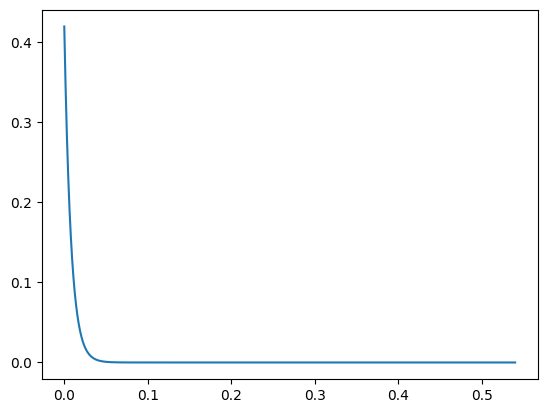

In [125]:
plt.plot(t, y)

In [126]:
taus = [9.34e-3, 2.83e-3, 43.0e-3, 0.38e-3]
signal, signal_int = [], []
max_amp_int = np.power(2,16)-1
sum = 0
for idx, ti in enumerate(t):
    for tau in taus:   

        sum += amplitude*np.exp(((-ti)/tau))
    
    signal.append(sum)
    signal_int.append(int(math.ceil(sum*max_amp_int)))
    sum=0

signal_int[0] 

110099

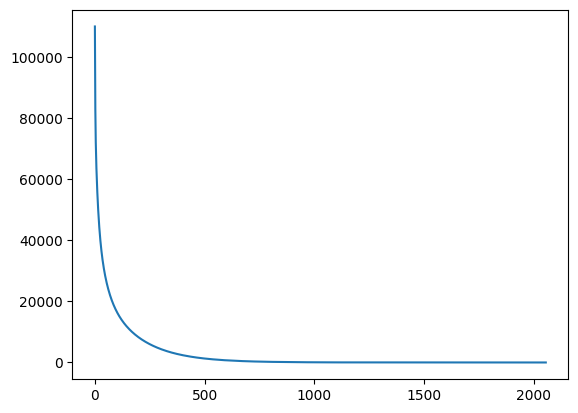

In [127]:
plt.plot(signal_int)

In [5]:

import math
t = np.linspace(0,11.2/2048, 2048)

taus = [9.34e-3, 2.83e-3, 43.0e-3, 0.38e-3]
num_samples = 2048
signal, signal_int = [], []
max_amp_int = np.power(2,16)-1
sum = 0
time_step = (45.0e-3*12.1)/2048

for i in range(num_samples):
    ti = i*time_step
    for tau in taus:   

        sum += 1*np.exp(((-ti)/tau))
    
    signal.append(sum)
    signal_int.append(int(math.ceil(sum*max_amp_int)))
    sum=0

signal_int[2000] 

1

In [150]:
time_step

0.000265869140625

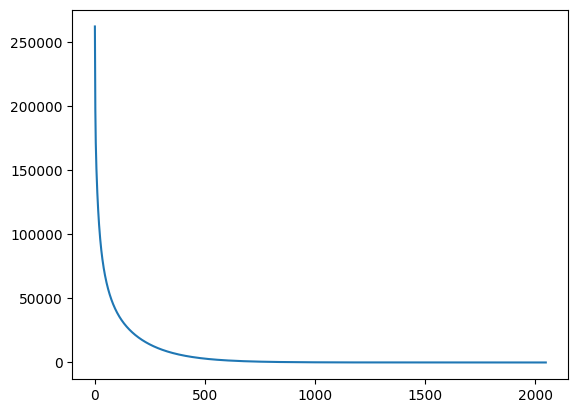

In [6]:
plt.plot(signal_int)

In [142]:
max_amp_int


65535